In [61]:
# from google.colab import drive
# drive.mount('/content/drive')

## 1. Import libraries

In [62]:
# !pip install pyvi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pyvi import ViTokenizer

## 2. Read data

In [2]:
# Đọc dữ liệu từ file json
data = pd.read_json("data\data_coment_tiki.json")
data.head()

,content,rating
0,"Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...",5
1,"Đóng gói cẩn thận, điện thoại còn nguyên seal,...",5
2,Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...,1
3,"Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...",3
4,"Màu xanh ở ngoài nhìn đẹp sang, thích hơ...",5


In [3]:
# Đổi nhãn
data.rename(columns={"content":"text","rating":"star"}, inplace=True)
data.head()

,text,star
0,"Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...",5
1,"Đóng gói cẩn thận, điện thoại còn nguyên seal,...",5
2,Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...,1
3,"Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...",3
4,"Màu xanh ở ngoài nhìn đẹp sang, thích hơ...",5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16115 entries, 0 to 16114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16115 non-null  object
 1   star    16115 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 188.9+ KB


=> Dữ liệu có 16115 phần tử và không có phần tử nào rỗng

## 3. Exploratory Data Analysis (EDA)

### Class distribution (Sự phân bố các lớp)

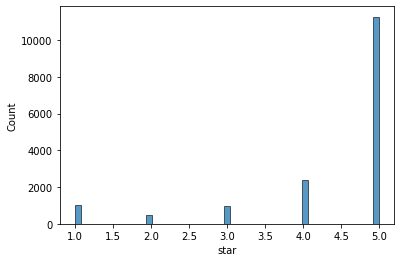

In [5]:
sns.histplot(data=data['star']);

### Do dữ liệu bị mất cân bằng nên ta xóa ngẫu nhiên 10000 mẫu 5 sao, và 1000 mẫu 4 sao

In [6]:
np.random.seed(10)
remove_n = 10000
drop_indices = np.random.choice(data[data['star'] == 5].index, remove_n, replace=False)
data = data.drop(drop_indices)

In [7]:
np.random.seed(10)
remove_n = 1000
drop_indices = np.random.choice(data[data['star'] == 4].index, remove_n, replace=False)
data = data.drop(drop_indices)

In [8]:
len(data)

5115

### Sự phân bố các lớp sau khi cân bằng dữ liệu

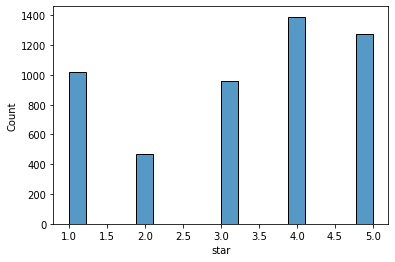

In [9]:
sns.histplot(data=data['star']);

## 4. Data cleaning

### Acronym words

In [10]:
acronym_words = []
acronym_words_dict = []
acronym_words = open('data/acronym_word.txt','r', encoding='utf-8')
acronym_words = acronym_words.readlines()
for i in range(len(acronym_words)):
  acronym_words_split = acronym_words[i].split("\t")
  for j in range(len(acronym_words_split)):
    acronym_words_split[j] = re.sub("[\n\ufeff]",'',acronym_words_split[j])
  try:
    acronym_words_dict.append({acronym_words_split[0]:acronym_words_split[1]})
  except: 
    pass

acronym_words_dict[:5]


[{'ship': 'vận chuyển'},
 {'shop': 'cửa hàng'},
 {'m': 'mình'},
 {'mik': 'mình'},
 {'ko': 'không'}]

### Stop words

In [11]:
stop_words = []
stop_words = open('data/stop_word.txt','r', encoding='utf-8')
stop_words = stop_words.readlines()
for i in range(len(stop_words)):
  stop_words[i] = re.sub("[\t\n\ufeff]",'',stop_words[i])

stop_words[:5]

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy']

In [12]:
"""**Tách từ**

"""

# Tách từ
def sementation(text):
  return ViTokenizer.tokenize(text)

In [13]:
"""**Chuẩn hóa**"""

# Chuẩn hóa unicode sang chuẩn unicode dựng sẵn
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

dicchar = loaddicchar()
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [14]:
# Hàm chuẩn hoá câu
def standardize_data(row):
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$-", "", row)
    # Xóa tất cả dấu chấm, phẩy, chấm phẩy, chấm thang, ... trong câu
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    row = row.strip().lower()
    return row

In [15]:
# Xử dụng bộ từ điển để thay thế các kiểu gõ dấu và viết tắt
def replace_acronyms(text):
  text_list = text.split(" ");
  for i in range(len(text_list)):
    for j in range(len(acronym_words_dict)):
      key = list(acronym_words_dict[j].keys())[0]
      value = list(acronym_words_dict[j].values())[0]
      if text_list[i] == key:
        text_list[i] = value
  return " ".join(text_list)


In [16]:
# Xử lý các từ viết trùng lắp
def remove_loop_char(text):
  text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), str(text), flags=re.IGNORECASE)
  text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
  return text

In [17]:
# Loại bỏ stop word
def remove_stop_word(text):
  split_word = text.split(" ");
  words = []
  for word in split_word:
    if word not in stop_words:
      words.append(word)
  return " ".join(words)

### Hàm tổng hợp tiền xử lý dữ liệu

In [18]:
"""**Tiền xử lý dữ liệu**"""
# Làm sạch dữ liệu
def text_prosessing(text):
    # Chuyển đổi thành chữ thường
    text = text.lower() 

    # Chuẩn hóa unicode sang chuẩn unicode dựng sẵn
    text = covert_unicode(text)

    # Chuẩn hóa câu
    text = standardize_data(text)

    # Thay thế từ viết tắt
    text = replace_acronyms(text)

    # Xử lý các từ viết trùng lắp
    text = remove_loop_char(text)

    # Xóa từ dừng
    # text = remove_stop_word(text)

    # Xóa các kí tự trong dấu []
    text = re.sub('\[.*?\]', '', text)

    # Xóa các kí tự đặc biệt
    text = re.sub("\W",' ',text) 

    # Xóa các đường link
    text = re.sub('https?://\S+|www\.\S+', ' ', text)

    # Xóa các số
    text = re.sub('\w*\d\w*', '', text)

    # Xóa các đoạn mã html
    text = re.sub(r'<[*>]*>',' ', text)

    #Xóa các kí tự xuống dòng
    text = " ".join(re.sub("\n", " ", text).split())

    # tách từ
    text = sementation(text)
    return text

### Apply vào dữ liệu của chúng ta

In [19]:
# Apply vào data
data['text'] = data['text'].apply(text_prosessing)

In [20]:
data.head()

,text,star
2,mình cho sao vì thái_độ dịch_vụ khách_hàng tại...,1
3,sản_phẩm tầm giá nhìn cũng đx mình mua cho pa ...,3
6,sản_phẩm mình mua được giao nhanh nhận hàng kh...,1
7,điện_thoại ổn gói dịch_vụ bảo_vệ thiết_bị di_đ...,3
8,đóng_gói cẩn_thận giao đúng lúc giờ đúng sản_p...,4


In [22]:
data['text'].iloc[17]

'sản_phẩm phù_hợp với mức giá nhưng phụ_kiện đi kèm thiếu tai_nghe ốp và dán màn_hình'

## 5. Build Model

In [23]:
len(data[data['star'] < 4])

2451

In [24]:
len(data[data['star'] >= 4])

2664

### Gộp 3 đánh giá 1 2 3 sao là đánh giá tiêu cực với nhãn là 0, 2 đánh giá 4 5 sao là tích cực với nhãn là 1

In [25]:
data["star"] = data["star"].map({1:0, 2:0, 3:0, 4:1, 5:1})

### Our current data (Dữ liệu hiện tại của chúng ta sẽ trong như sau)

In [26]:
data.head(5)

,text,star
2,mình cho sao vì thái_độ dịch_vụ khách_hàng tại...,0
3,sản_phẩm tầm giá nhìn cũng đx mình mua cho pa ...,0
6,sản_phẩm mình mua được giao nhanh nhận hàng kh...,0
7,điện_thoại ổn gói dịch_vụ bảo_vệ thiết_bị di_đ...,0
8,đóng_gói cẩn_thận giao đúng lúc giờ đúng sản_p...,1


In [27]:
np.array(data['text'])[:2]

array(['mình cho sao vì thái_độ dịch_vụ khách_hàng tại tiki lần này mình đặt điện_thoại lần mất gần tuần mới nhận được hàng lần đầu đặt bị trễ lịch hẹn giao tiki gửi thông_báo xin_lỗi và hẹn giao lại sau ngày làm_việc dù đang rất cần nhưng mình vẫn kiên_nhẫn đợi sau ngày làm_việc tiki không_những không giao hàng mà_lại còn âm_thầm_hủy_đơn của mình không hề có cuộc điện_thoại thông_báo hay xin_lỗi mình gọi lên tổng_đài gặp trúng bạn chăm_sóc khách_hàng thái_độ rất tệ giọng như buồn_ngủ không biết cách nói_chuyện với khách_hàng hỏi thì chỉ nói do hoàn_cảnh nên không giao hàng bạn không giải_thích lý_do vì_sao hủy_đơn không hỏi ý_kiến khách và cũng không làm_khách nguôi giận dù mình rất dễ_tính sau đó mình được cho mã giảm bù lại nhưng giá điện_thoại khi đó tăng lên dù giảm vẫn cao hơn lúc đầu mình đặt mua vậy tặng lại mã cho khách làm gì đặt lần mình chờ ngày cuối_cùng cũng cầm được cái điện_thoại rất thất_vọng thái_độ phục_vụ của tiki làm khách_hàng trung_thành tiki bao lần mà lần này n

In [28]:
X = data['text']
y = data['star']

In [29]:
X.head(3)

2    mình cho sao vì thái_độ dịch_vụ khách_hàng tại...
3    sản_phẩm tầm giá nhìn cũng đx mình mua cho pa ...
6    sản_phẩm mình mua được giao nhanh nhận hàng kh...
Name: text, dtype: object

In [30]:
y.head()

2    0
3    0
6    0
7    0
8    1
Name: star, dtype: int64

### Sử dụng các giải thuật máy học để huấn luyện mô hình và nghi thức đánh giá K-Fold

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

#### Dùng thư viện Count Vectorizer để vector hóa dữ liệu văn bản 

In [32]:
cv = CountVectorizer()
X_vectors = cv.fit_transform(X)

In [33]:
print(X_vectors.shape)

(5115, 5271)


vector của chúng ta có độ dài 5271

In [34]:
print(len(cv.get_feature_names()))
print(X_vectors.todense().shape)
print(X_vectors.todense()[0].shape)
print(len(X))

5271
(5115, 5271)
(1, 5271)
5115


In [35]:
print(X_vectors)

  (0, 2445)	11
  (0, 440)	4
  (0, 3434)	1
  (0, 4581)	1
  (0, 3797)	4
  (0, 1072)	2
  (0, 1819)	5
  (0, 4326)	1
  (0, 3951)	6
  (0, 2217)	7
  (0, 2920)	2
  (0, 5128)	4
  (0, 4968)	5
  (0, 2492)	1
  (0, 1357)	1
  (0, 4223)	1
  (0, 2554)	1
  (0, 2843)	2
  (0, 5089)	3
  (0, 1534)	3
  (0, 5102)	2
  (0, 311)	1
  (0, 4180)	1
  (0, 2245)	1
  (0, 1629)	2
  :	:
  (5113, 5270)	1
  (5113, 4245)	1
  (5113, 4672)	1
  (5113, 3769)	2
  (5113, 4835)	1
  (5113, 1854)	1
  (5113, 5212)	1
  (5113, 1556)	2
  (5113, 4742)	1
  (5113, 5232)	2
  (5113, 179)	1
  (5113, 2192)	2
  (5113, 4379)	1
  (5114, 2920)	1
  (5114, 5089)	1
  (5114, 4666)	1
  (5114, 3813)	3
  (5114, 831)	1
  (5114, 2398)	1
  (5114, 1586)	1
  (5114, 624)	1
  (5114, 4080)	2
  (5114, 661)	2
  (5114, 4768)	1
  (5114, 2980)	1


In [ ]:
print(cv.vocabulary_)

#### Huấn luyện mô hình bằng DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.7294287396037182


#### Huấn luyện mô hình bằng KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.6936452727495108


#### Huấn luyện mô hình bằng MultinomialNB

In [38]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.8041111179060666


#### Huấn luyện mô hình bằng RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.807831610812133


#### Huấn luyện mô hình bằng SVM

In [40]:
from sklearn.svm import SVC

model = SVC()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.8154430650684932


SVC với nghi thức đánh giá hold-out

In [127]:
from sklearn.svm import SVC
total_accuracy = float()
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    cv = CountVectorizer()
    X_train_vector = cv.fit_transform(X_train)  # dùng để huấn luyện
    X_test_vector = cv.transform(X_test)  # dùng để dự đoán
    model = SVC()
    model.fit(X_train_vector, y_train)
    y_pred = model.predict(X_test_vector)
    total_accuracy += accuracy_score(y_test, y_pred)

print('Accuracy:', total_accuracy/10)

Accuracy: 0.8181640625


### Kết quả huấn luyện

Lần 1

DecisionTreeClassifier 0.7000879097358121

KNeighborsClassifier 0.6461357937866927

MultinomialNB 0.7798656127690802

RandomForestClassifier 0.7812347113502935

SVC 0.7788775837818004

Giải thuật Ramdom Forest cho kết quả tốt nhất với độ chính xác 78.12%

Lần 2

Khi không loại bỏ từ dừng

DecisionTreeClassifier 0.7366510977250489

KNeighborsClassifier 0.6973600324119374

MultinomialNB 0.8035244159735813

RandomForestClassifier 0.8113441780821917

SVC 0.8146599039872798

Giải thuật SVM cho kết quả tốt nhất với độ chính xác 81.36%

=> Khi không loại bỏ từ dừng thì độ chính xác thu được sẽ cao hơn

### Lưu model
Model được lưu lại thành file pickle được sử dụng để viết chương trình dự đoán

In [122]:
from sklearn.metrics import accuracy_score
import pickle

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [121]:
len(X_train), len(X_test)

(4603, 512)

In [156]:
cv = CountVectorizer()
X_train_vector = cv.fit_transform(X_train)
X_test_vector = cv.transform(X_test)
svc_model = SVC()
svc_model.fit(X_train_vector, y_train)

y_pred = svc_model.predict(X_test_vector)
print('accuracy_score:', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy_score: 0.818359375


Không gian vector của tập dữ liệu train

In [153]:
print(len(cv.get_feature_names()))
print(X_train_vector.shape)
print(X_test_vector.shape)

5043
(4603, 5043)
(512, 5043)


Ghi lại ra file

In [155]:
with open("CountVectorizerAndSVC.pkl", 'wb') as fout:
    pickle.dump((cv, svc_model), fout)

### Đọc model
Model phải được đọc trở lại từ file, sử dụng để viết website

Để chắn chắn rằng vector và model đã được đọc nên ta đặt tên biến khác, đồng thời áp dụng vector hóa lên X

In [158]:
with open('CountVectorizerAndSVC.pkl', 'rb') as file:
    vector, model = pickle.load(file)

In [159]:
X_vector = vector.transform(X)
y_pred = model.predict(X_vector)
print('accuracy_score:', accuracy_score(y_true=y, y_pred=y_pred))

accuracy_score: 0.9018572825024438


### Thử cải thiện mô hình bằng PhoBERT
Tham khảo từ blog của anh Thắng Mì AI: https://github.com/thangnch/MiAI_Sentiment_Analysis_PhoBert/blob/main/train_model.py

In [ ]:
!pip install underthesea

In [ ]:
from transformers import AutoModel, AutoTokenizer # Thư viện BERT
import torch
import underthesea

In [ ]:
# Hàm load model BERT
def load_bert():
    v_phobert = AutoModel.from_pretrained("vinai/phobert-base")
    v_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
    return v_phobert, v_tokenizer

In [ ]:
# Hàm tạo ra bert features
def make_bert_features(v_text):
    global phobert
    v_tokenized = []
    max_len = 100 # Mỗi câu dài tối đa 100 từ
    for i_text in v_text:
        print("Đang xử lý line = ", i_text)
        # Phân thành từng từ
        line = underthesea.word_tokenize(i_text)
        # Ghép lại thành câu như cũ sau khi lọc
        line = " ".join(line)
        line = underthesea.word_tokenize(line, format="text")
        print("Word segment  = ", line)
        # Tokenize bởi BERT
        line = tokenizer.encode(line)
        v_tokenized.append(line)

    # Chèn thêm số 1 vào cuối câu nếu như không đủ 100 từ
    padded = np.array([i + [1] * (max_len - len(i)) for i in v_tokenized])
#     print('padded:', padded[0])
#     print('len padded:', padded.shape)

    # Đánh dấu các từ thêm vào = 0 để không tính vào quá trình lấy features
    attention_mask = np.where(padded == 1, 0, 1)
#     print('attention mask:', attention_mask[0])

    # Chuyển thành tensor
    padded = torch.tensor(padded).to(torch.long)
#     print("Padd = ",padded.size())
    attention_mask = torch.tensor(attention_mask)

    # Lấy features dầu ra từ BERT
    with torch.no_grad():
        last_hidden_states = phobert(input_ids= padded, attention_mask=attention_mask)

    v_features = last_hidden_states[0][:, 0, :].numpy()
    print(v_features.shape)
    return v_features

In [ ]:
print("Chuẩn bị nạp model BERT....")
phobert, tokenizer = load_bert()
print("Đã nạp xong model BERT.")

In [ ]:
print("Chuẩn bị tạo features từ BERT.....")
global phobert
v_tokenized = []
max_len = 80 # Mỗi câu dài tối đa 90 từ
for i_text in X:
#     print("Đang xử lý line = ", i_text)
    # Phân thành từng từ
    line = underthesea.word_tokenize(i_text)
    # Ghép lại thành câu như cũ sau khi lọc
    line = " ".join(line)
    line = underthesea.word_tokenize(line, format="text")
#     print("Word segment  = ", line)
    # Tokenize bởi BERT
    line = tokenizer.encode(line)
    v_tokenized.append(line)

# Chèn thêm số 1 vào cuối câu nếu như không đủ 100 từ
padded = np.array([np.array(i[:max_len-len(i)]) if len(i) > max_len else np.array(i + [1] * (max_len - len(i))) for i in v_tokenized])
print('padded:', padded[0])
print('len padded:', padded.shape)


In [ ]:
# Đánh dấu các từ thêm vào = 0 để không tính vào quá trình lấy features
attention_mask = np.where(padded == 1, 0, 1)
print('attention mask:', attention_mask[0])

In [ ]:
# Đánh dấu các từ thêm vào = 0 để không tính vào quá trình lấy features
attention_mask = np.where(padded == 1, 0, 1)
print('attention mask:', attention_mask[0].shape)

In [ ]:
# Chuyển thành tensor
padded = torch.tensor(padded).to(torch.long)
print("Padd = ",padded.size())
attention_mask = torch.tensor(attention_mask)

In [ ]:
# Lấy features dầu ra từ BERT
with torch.no_grad():
    last_hidden_states = phobert(input_ids= padded, attention_mask=attention_mask)

v_features = last_hidden_states[0][:, 0, :].numpy()
print(v_features.shape)
print("Đã tạo xong features từ BERT")

In [ ]:
v_features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(v_features, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

In [ ]:
print("Chuẩn bị train model SVM....")
cl = SVC(kernel='linear', probability=True, gamma=0.125)
cl.fit(X_train, y_train)

sc = cl.score(X_test, y_test)
print('Kết quả train model, độ chính xác = ', sc*100, '%')

In [ ]:
y_pred = cl.predict(X_test)
print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

In [ ]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
pred_y = NB_model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Training accuracy: %.4f' % accuracy_score(y_train, NB_model.predict(X_train)))
print('Test accuracy: %.4f' % accuracy_score(y_test, pred_y))

### Thử cải thiện mô hình bằng PhoBERT

Tham Khảo từ Phạm Hữu Quang trên viblo: https://viblo.asia/p/bert-roberta-phobert-bertweet-ung-dung-state-of-the-art-pre-trained-model-cho-bai-toan-phan-loai-van-ban-4P856PEWZY3


Cài đặt transformers

In [1]:
!pip install transformers

     |████████████████████████████████| 3.3 MB 4.7 MB/s 
     |████████████████████████████████| 61 kB 410 kB/s 
     |████████████████████████████████| 895 kB 40.9 MB/s 
     |████████████████████████████████| 3.3 MB 11.3 MB/s 
     |████████████████████████████████| 596 kB 37.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Tải về pre-trained PhoBERT base transformers

In [5]:
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz

--2021-12-15 06:32:41--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 65.8.49.47, 65.8.49.95, 65.8.49.107, ...
Connecting to public.vinai.io (public.vinai.io)|65.8.49.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz’

PhoBERT_base_transf 100%[===================>] 307.47M  89.4MB/s    in 3.4s    

2021-12-15 06:32:45 (89.7 MB/s) - ‘PhoBERT_base_transformers.tar.gz’ saved [322405979/322405979]

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt


Kế tiếp, chúng ta cài đặt fastBPE và FAIRSeq

In [49]:
!pip install fastBPE
!pip install fairseq

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp37-cp37m-linux_x86_64.whl size=483110 sha256=a8efc2afe73951017d7344f00f65210207a189f9f0ed3521c439bfae49652683
  Stored in directory: /root/.cache/pip/wheels/bd/d4/0e/0d317a65f77d3f8049fedd8a2ee0519164cf3e6bd77ef886f1
Successfully built fastBPE
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 145 kB 45.4 MB/s 
     |████████████████████████████████| 90 kB 8.8 MB/s 
     |████████████████████████████████| 112 kB 31.9 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=6791e5bc6c728a79b7db337afa1023d8cbd142685cd78e1602a4a616205d2894
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


In [50]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="/content/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/PhoBERT_base_transformers/dict.txt")

In [51]:
bpe.encode('Hôm_nay trời nóng quá nên tôi ở nhà viết Viblo!')

'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !'

In [52]:
vocab.encode_line('<s> ' + 'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !' + ' </s>')

tensor([    0,  3791,  1027,   898,   204,    77,    70,    25,    69,   467,
         3696, 16856,   381,     2,     2], dtype=torch.int32)

In [53]:
X.head(3)

2    thái_độ dịch_vụ khách_hàng tiki điện_thoại tuầ...
3    sản_phẩm tầm giá đx mua pa mẹ yêu_cầu hơi thất...
6    sản_phẩm mua giao hàng khui kiểm_tra góc màn_h...
Name: text, dtype: object

In [54]:
y.head()

2    0
3    0
6    0
7    0
8    1
Name: star, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

train_sents, val_sents, train_labels, val_labels = train_test_split(X.tolist(), y.tolist(), test_size=0.1)

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 125

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

In [57]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]

    val_masks.append(mask)

In [58]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [6]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    "/content/PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 2, output_hidden_states=False,
)
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    "/content/PhoBERT_base_transformers/model.bin",
    config=config
)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at /content/PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertFor

In [59]:
BERT_SA.cuda()
print('Done')

Done


In [60]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

In [61]:
import random
from tqdm import tqdm_notebook
device = 'cuda'
epochs = 10

param_optimizer = list(BERT_SA.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Validation...")
    BERT_SA.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    for batch in tqdm_notebook(val_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")

======== Epoch 1 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.6746
 F1 score: 0.6459
 Average training loss: 0.6050
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7500
 F1 score: 0.7427
======== Epoch 2 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.7818
 F1 score: 0.7743
 Average training loss: 0.4739
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7676
 F1 score: 0.7634
======== Epoch 3 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.8260
 F1 score: 0.8195
 Average training loss: 0.4031
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7871
 F1 score: 0.7829
======== Epoch 4 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.8505
 F1 score: 0.8450
 Average training loss: 0.3552
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7930
 F1 score: 0.7879
======== Epoch 5 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.8815
 F1 score: 0.8771
 Average training loss: 0.3071
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7812
 F1 score: 0.7764
======== Epoch 6 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9027
 F1 score: 0.8991
 Average training loss: 0.2603
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7715
 F1 score: 0.7666
======== Epoch 7 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9135
 F1 score: 0.9102
 Average training loss: 0.2350
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7734
 F1 score: 0.7693
======== Epoch 8 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9203
 F1 score: 0.9173
 Average training loss: 0.2192
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7754
 F1 score: 0.7709
======== Epoch 9 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9324
 F1 score: 0.9298
 Average training loss: 0.1921
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7695
 F1 score: 0.7587
======== Epoch 10 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9360
 F1 score: 0.9335
 Average training loss: 0.1785
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.7812
 F1 score: 0.7744
Training complete!


Kết quả huấn luyện lần 1

Accuracy: 0.7812

F1 score: 0.7744